Début ZFE Grenoble : 2019-05-02
Stations présentes :      station_id         station_name
0       FR15043  Grenoble Les Frenes
2919    FR15046  Grenoble Boulevards
Aperçu monthly :


,station_id,station_name,date,no2_ug_m3
0,FR15043,Grenoble Les Frenes,2016-02-01,24.080000
1,FR15043,Grenoble Les Frenes,2016-03-01,21.774194
2,FR15043,Grenoble Les Frenes,2016-04-01,15.356667
3,FR15043,Grenoble Les Frenes,2016-05-01,12.516129
4,FR15043,Grenoble Les Frenes,2016-06-01,13.043333


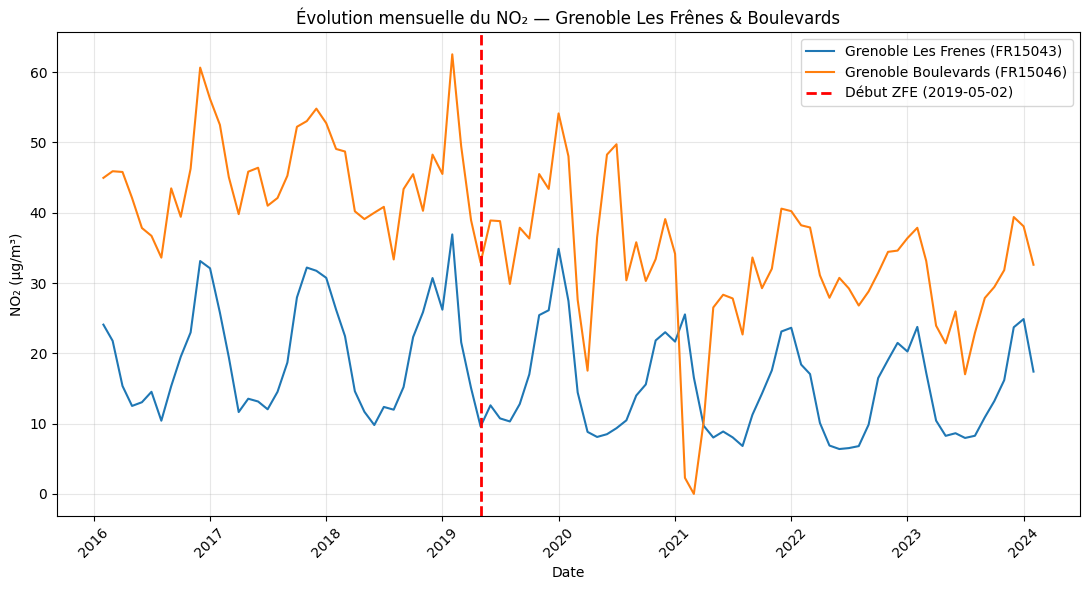

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# ---------- chemins ----------
HERE = Path().resolve()      # zfe-scm/
ROOT = HERE.parent           # racine du projet
DATA = ROOT / "data"

# ---------- 1) date de début de la ZFE Grenoble ----------
meta = pd.read_csv(DATA / "zfe_meta.csv")
grenoble_row = meta.loc[meta["publisher_zfe_id"] == "GRENOBLE"].iloc[0]
zfe_start = pd.to_datetime(grenoble_row["first_date_debut"])
print("Début ZFE Grenoble :", zfe_start.date())

# ---------- 2) NO2 daily propre pour les deux stations ----------
no2 = pd.read_csv(DATA / "pollution_grenoble_no2_daily_clean.csv")
no2["date"] = pd.to_datetime(no2["date"])

print("Stations présentes :", no2[["station_id", "station_name"]].drop_duplicates())

# ---------- 3) agrégation mensuelle par station ----------
no2 = no2.set_index("date")

monthly = (
    no2
    .groupby(["station_id", "station_name"])["no2_ug_m3"]
    .resample("MS")   # MS = début de mois
    .mean()
    .reset_index()
)

print("Aperçu monthly :")
display(monthly.head())

# ---------- 4) tracé pour Les Frênes + Boulevards ----------
plt.figure(figsize=(11, 6))

for (sid, name), sub in monthly.groupby(["station_id", "station_name"]):
    plt.plot(sub["date"], sub["no2_ug_m3"], label=f"{name} ({sid})")

# trait vertical rouge = début ZFE
plt.axvline(
    zfe_start,
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Début ZFE ({zfe_start.date()})",
)

plt.title("Évolution mensuelle du NO₂ — Grenoble Les Frênes & Boulevards")
plt.xlabel("Date")
plt.ylabel("NO₂ (µg/m³)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
